# 深度学习实验四:卷积神经网络编程

本次实验练习使用torch.nn中的类设计一个卷积神经网络进行MNIST手写体数字图像分类。

In [22]:
name = '王浩南'#填写你的姓名
sid = 'E02014154'#填写你的学号

print('姓名:%s, 学号:%s'%(name, sid))

姓名:王浩南, 学号:E02014154


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 设计CNN类

从torch.nn.Module派生一个子类CNN，表示一个卷积神经网络;

请合理设计网络各个层，尝试使用不同的结构，比如skip connection, batch normalization,group convolution等。

你的网络模型中至少有2个卷积层、2个聚合层。

In [24]:
#在下面添加代码，实现卷积神经网络,用于识别MNIST手写体数字
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # 定义卷积层1，输入通道数为1，输出通道数为16，卷积核大小为3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        # 定义批量归一化层1
        self.bn1 = nn.BatchNorm2d(num_features=16)
        # 定义激活函数
        self.act1 = nn.ReLU()
        # 定义池化层1，池化核大小为2x2
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        # 定义卷积层2，输入通道数为16，输出通道数为32，卷积核大小为3x3
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        # 定义批量归一化层2
        self.bn2 = nn.BatchNorm2d(num_features=32)
        # 定义激活函数
        self.act2 = nn.ReLU()
        # 定义池化层2，池化核大小为2x2
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        # 定义跳跃连接
        self.residual = nn.Sequential(
            # 定义卷积层3，输入通道数为32，输出通道数为32，卷积核大小为3x3
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
            # 定        nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            # 定义卷积层4，输入通道数为32，输出通道数为32，卷积核大小为3x3
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
            nn.BatchNorm2d(num_features=32)
        )
    
        # 定义全连接层1
        self.fc1 = nn.Linear(in_features=8*10*10, out_features=64)
        # 定义全连接层2，输入神经元数为64，输出神经元数为10（因为MNIST数据集的输出类别为10个数字）
        self.fc2 = nn.Linear(in_features=64, out_features=10)
    
    def forward(self, x):
        # 前向传播流程
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        # 跳跃连接的前向传播
        residual = self.residual(x)
        # 将输入x与跳跃连接的输出相加
        x = x + residual
        
        # 将二维特征图展平成一维向量
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x



In [25]:
#测试MLP类
X = torch.rand((10,1,28,28),dtype = torch.float32)
net = CNN()
Y = net(X)
print(Y)

tensor([[-0.8682,  0.1605,  0.4911,  0.7181, -0.7251,  0.4774, -1.0980, -0.1482,
          1.1306,  0.0785],
        [-1.1631,  0.6995,  1.1335,  0.1324, -0.3019,  0.7909, -0.5080, -0.8281,
          0.0325,  0.2414],
        [-0.2611,  0.3328,  0.4888,  1.1022, -0.5914,  1.0592, -0.0701, -0.6861,
         -0.3796,  0.4715],
        [-0.1223,  0.2577,  0.6662,  0.6452,  0.0771,  0.5047, -0.3628, -0.4464,
          0.4336,  0.2948],
        [-1.0252,  0.2605, -0.0290,  0.5742, -0.3966, -0.6452, -0.4511,  0.1289,
         -0.0438,  0.3843],
        [-0.2407, -0.0435,  0.0616,  0.0031, -0.4486, -0.1255, -1.0099,  0.2278,
          0.4873,  0.1565],
        [-0.1515, -0.2425,  0.0154, -0.1234, -0.1122,  0.0861, -0.7209, -0.0528,
          0.5350,  0.4649],
        [-0.9976,  0.2653,  0.4016,  1.5422, -0.3160, -0.2356,  0.0332, -1.0976,
         -0.2934, -0.0694],
        [ 0.4294, -0.1055, -0.4747,  0.8250, -0.2353,  0.1416,  0.1755,  0.6816,
         -0.1462,  0.9976],
        [-0.3834,  

In [26]:
Y.shape #N*10

torch.Size([10, 10])

In [27]:
#了解MLP中的参数
for name,param in net.named_parameters():
    print(name,':',param.size())

conv1.weight : torch.Size([16, 1, 3, 3])
conv1.bias : torch.Size([16])
bn1.weight : torch.Size([16])
bn1.bias : torch.Size([16])
conv2.weight : torch.Size([32, 16, 3, 3])
conv2.bias : torch.Size([32])
bn2.weight : torch.Size([32])
bn2.bias : torch.Size([32])
residual.0.weight : torch.Size([32, 32, 3, 3])
residual.0.bias : torch.Size([32])
residual.2.weight : torch.Size([32, 32, 3, 3])
residual.2.bias : torch.Size([32])
residual.3.weight : torch.Size([32])
residual.3.bias : torch.Size([32])
fc1.weight : torch.Size([64, 800])
fc1.bias : torch.Size([64])
fc2.weight : torch.Size([10, 64])
fc2.bias : torch.Size([10])


In [28]:
#输出模型
print(net)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc1): Linear(in_features=800, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [29]:
#用torchsummary输出模型结构
%pip install -i https://pypi.tuna.tsinghua.edu.cn/simple torchsummary

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [30]:
from torchsummary import summary

summary(net.cuda(), input_size = (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
         MaxPool2d-4           [-1, 16, 13, 13]               0
            Conv2d-5           [-1, 32, 11, 11]           4,640
       BatchNorm2d-6           [-1, 32, 11, 11]              64
              ReLU-7           [-1, 32, 11, 11]               0
         MaxPool2d-8             [-1, 32, 5, 5]               0
            Conv2d-9             [-1, 32, 3, 3]           9,248
             ReLU-10             [-1, 32, 3, 3]               0
           Conv2d-11             [-1, 32, 1, 1]           9,248
      BatchNorm2d-12             [-1, 32, 1, 1]              64
           Linear-13                   [-1, 64]          51,264
           Linear-14                   

# 2.训练模型

# 2.1 第一步，对数据做预处理

MNIST图像的像素取值范围是[0,1]，先把值域改变为[-1,1]. 在PyTorch中，可以使用torchvision.transforms.Normalize类处理。

In [31]:
from torchvision import datasets,transforms

#构造一个变换，将像素值范围变换到[-1,1]
normalizer =  transforms.Normalize((0.5,), (0.5,))#一行代码

In [32]:
#定义一个变换序列transform，包含两个变换：第一个将PIL图像转换为张量，第二个是normalizer

transform = transforms.Compose([transforms.ToTensor(), normalizer])#一行代码

# 2.2 第二步，构造训练集，加入预处理

In [33]:
data_path = '../data/'
mnist_train = datasets.MNIST(data_path,download=False,train = True,transform = transform)
mnist_test =  datasets.MNIST(data_path,download=False,train = False,transform = transform)

# 2.3 第三步，构造加载器

In [34]:
batch_size = 32 #可以自己定义batch_size大小
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = batch_size, shuffle = False)

In [35]:
#从加载器里获取一批样本，并输出样本张量的形状
imgs,labels = next(iter(train_loader))#一行样本

In [36]:
imgs.shape

torch.Size([32, 1, 28, 28])

In [37]:
labels.shape

torch.Size([32])

# 2.4 第四步，训练模型

注意：训练卷积神经网络时，网络的输入是四维张量，尺寸为$N\times C \times H \times W$，分别表示张量

In [38]:
def Train(model, loader, epochs, lr = 0.1):
    epsilon = 1e-6
    
    #将model置于train模式
    #一行代码
    net.train()
    
    #定义合适的优化器
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)#一行代码
    
    #定义损失函数
    loss = F.cross_entropy#一行代码
    
    #请在下面完成训练代码
    #请在迭代过程中每100次迭代，输出一次损失
    loss0 = 0
    for epoch in range(epochs):
        for it,(imgs, labels) in enumerate(loader):
            #1. zero_grads
            #请用一行代码实现
            optimizer.zero_grad()
            imgs, labels = imgs.cuda(), labels.cuda()

            #2. F.P.前向传播
            #请用一行代码实现
            logits = model(imgs)

            #3. 计算损失            
            loss1 = loss(logits, labels)#请用一行代码实现
            
            if(abs(loss1.item() - loss0)<epsilon):
                break
                
            loss0 = loss1.item()
                
            if it%100==0:
                print('epoch %d, iter %d, loss = %f\n'%(epoch,it,loss1.item()))
                
            #4. 后向传播
            #请用一行代码实现
            loss1.backward()
            
            #5. 梯度下降
            #请用一行代码实现.
            optimizer.step()    
    return model            

In [39]:
#训练模型

model = CNN()
model = model.cuda()
model = Train(model, test_loader, 10)

epoch 0, iter 0, loss = 2.422731

epoch 0, iter 100, loss = 0.207329

epoch 0, iter 200, loss = 0.110273

epoch 0, iter 300, loss = 0.041615

epoch 1, iter 0, loss = 0.081537

epoch 1, iter 100, loss = 0.069740

epoch 1, iter 200, loss = 0.076988

epoch 1, iter 300, loss = 0.019053

epoch 2, iter 0, loss = 0.064827

epoch 2, iter 100, loss = 0.079209

epoch 2, iter 200, loss = 0.030889

epoch 2, iter 300, loss = 0.010652

epoch 3, iter 0, loss = 0.024355

epoch 3, iter 100, loss = 0.074961

epoch 3, iter 200, loss = 0.019660

epoch 3, iter 300, loss = 0.008648

epoch 4, iter 0, loss = 0.016925

epoch 4, iter 100, loss = 0.048685

epoch 4, iter 200, loss = 0.019468

epoch 4, iter 300, loss = 0.003656

epoch 5, iter 0, loss = 0.009265

epoch 5, iter 100, loss = 0.017451

epoch 5, iter 200, loss = 0.010626

epoch 5, iter 300, loss = 0.003540

epoch 6, iter 0, loss = 0.007760

epoch 6, iter 100, loss = 0.005723

epoch 6, iter 200, loss = 0.011349

epoch 6, iter 300, loss = 0.003354

epoch 

# 2.5 第五步，测试模型

In [40]:
#编写模型测试过程
def Evaluate(model, loader):
    model.eval()
    correct = 0
    counts = 0
    for imgs, labels in loader:
        imgs, labels = imgs.cuda(), labels.cuda()
        logits = model(imgs)
        yhat = logits.argmax(dim = 1)
        correct = correct + (yhat==labels).sum().item()
        counts = counts + imgs.size(0)
    
    accuracy = correct / counts
    
    return accuracy

In [46]:
acc = Evaluate(model,test_loader)
print('Accuracy = %0.3f'%(acc))

Accuracy = 1.000


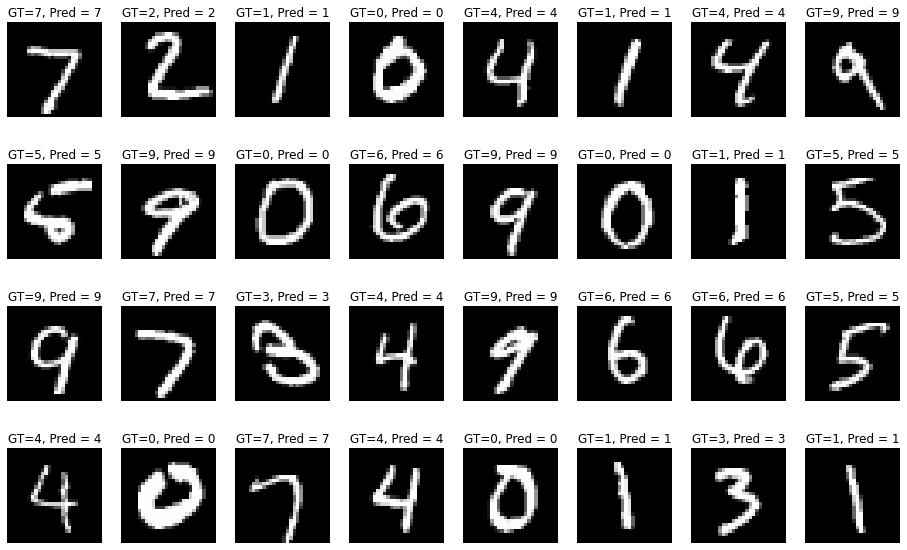

In [42]:
imgs,labels  = next(iter(test_loader))
imgs, labels = imgs.cuda(), labels.cuda()

logits = model(imgs)

imgs, labels = imgs.cpu(), labels.cpu()

yhat = logits.argmax(dim = 1)

plt.figure(figsize = (16,10))
for i in range(imgs.size(0)):
    plt.subplot(4,8,i+1)
    plt.imshow(imgs[i].squeeze()/2+0.5,cmap = 'gray')
    plt.axis('off')
    plt.title('GT=%d, Pred = %d'%(labels[i],yhat[i]))
    
plt.show()
